In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Введение

In [3]:
file_path = "data (2).xlsx"
read_df = pd.read_excel(file_path)
df = read_df[1:].T[4:60].rename(columns = {1:"Year" ,2:"USA", 3:"France"}).reset_index(drop=True)
for col in df:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Исходные данные

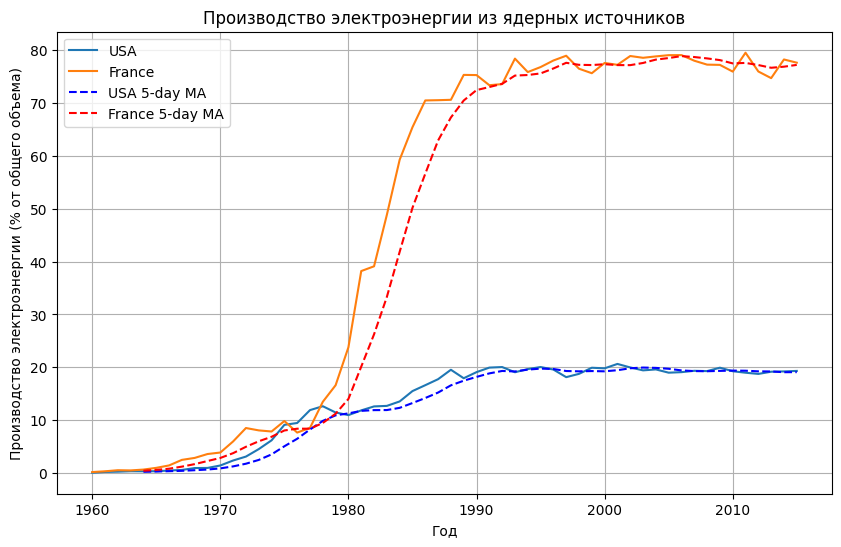

Динамика производства электроэнергии из ядерных источников:
Соединенные Штаты Америки: 27793.18%
Франция: 39808.67%
Темп прироста производства электроэнергии из ядерных источников:
Соединенные Штаты Америки: 0.1058
Франция: 0.1129


In [4]:
# Вычисление скользящего среднего
window_size = 5  # Размер окна для скользящего среднего
rolling_usa = df["USA"].rolling(window=window_size).mean()
rolling_france = df["France"].rolling(window=window_size).mean()

# Построение графиков с добавлением скользящего среднего
plt.figure(figsize=(10, 6))

plt.plot(df["Year"], df["USA"], label="USA")
plt.plot(df["Year"], df["France"], label="France")

plt.plot(df["Year"], rolling_usa, linestyle='--', color='blue', label=f'USA {window_size}-day MA')
plt.plot(df["Year"], rolling_france, linestyle='--', color='red', label=f'France {window_size}-day MA')

plt.title("Производство электроэнергии из ядерных источников")
plt.xlabel("Год")
plt.ylabel("Производство электроэнергии (% от общего объема)")
plt.legend()
plt.grid(True)

plt.show()

# Анализ динамики
us_growth = (df["USA"].iloc[-1] - df["USA"].iloc[0]) / df["USA"].iloc[0] * 100
france_growth = (df["France"].iloc[-1] - df["France"].iloc[0]) / df["France"].iloc[0] * 100

print("Динамика производства электроэнергии из ядерных источников:")
print(f"Соединенные Штаты Америки: {us_growth:.2f}%")
print(f"Франция: {france_growth:.2f}%") 

# Начальное и конечное значения производства электроэнергии из ядерных источников
initial_value_usa = df["USA"].iloc[0]
final_value_usa = df["USA"].iloc[-1]
initial_value_france = df["France"].iloc[0]
final_value_france = df["France"].iloc[-1]

# Количество лет
num_years = df.shape[0]

# Расчет темпа прироста
growth_rate_usa = ((final_value_usa / initial_value_usa) ** (1 / num_years)) - 1
growth_rate_france = ((final_value_france / initial_value_france) ** (1 / num_years)) - 1

print("Темп прироста производства электроэнергии из ядерных источников:")
print(f"Соединенные Штаты Америки: {growth_rate_usa:.4f}")
print(f"Франция: {growth_rate_france:.4f}")


In [5]:
# Рассчитываем основные дескриптивные статистики для США
usa_mean = df["USA"].mean()
usa_std = df["USA"].std()
usa_min = df["USA"].min()
usa_max = df["USA"].max()

# Рассчитываем основные дескриптивные статистики для Франции
france_mean = df["France"].mean()
france_std = df["France"].std()
france_min = df["France"].min()
france_max = df["France"].max()

# Выводим результаты
print("Дескриптивные статистики для производства электроэнергии из ядерных источников:")
print("Соединенные Штаты Америки:")
print(f"Среднее значение: {usa_mean:.2f}")
print(f"Стандартное отклонение: {usa_std:.2f}")
print(f"Минимальное значение: {usa_min:.2f}")
print(f"Максимальное значение: {usa_max:.2f}")

print("\nФранция:")
print(f"Среднее значение: {france_mean:.2f}")
print(f"Стандартное отклонение: {france_std:.2f}")
print(f"Минимальное значение: {france_min:.2f}")
print(f"Максимальное значение: {france_max:.2f}")


Дескриптивные статистики для производства электроэнергии из ядерных источников:
Соединенные Штаты Америки:
Среднее значение: 13.06
Стандартное отклонение: 7.70
Минимальное значение: 0.07
Максимальное значение: 20.65

Франция:
Среднее значение: 47.71
Стандартное отклонение: 33.76
Минимальное значение: 0.19
Максимальное значение: 79.51


# Основные компоненты временного ряда

## 3.1

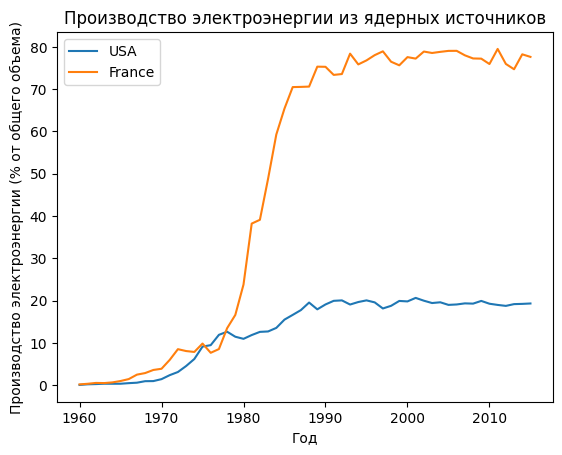

In [6]:
df.plot(x='Year', y=['USA', 'France'], kind='line')
plt.title("Производство электроэнергии из ядерных источников")
plt.xlabel("Год")
plt.ylabel("Производство электроэнергии (% от общего объема)")
plt.show()

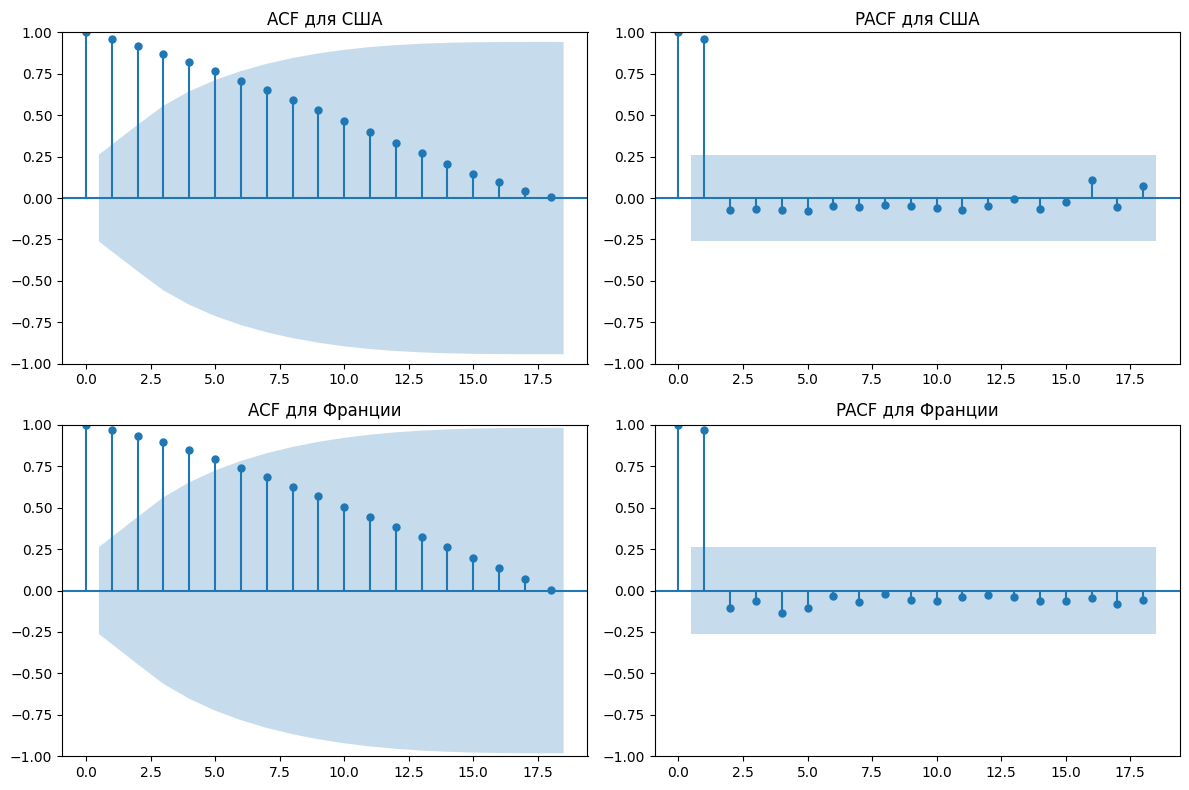

In [7]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# ACF для США
plot_acf(df['USA'].values.squeeze(), ax=axes[0, 0], title='ACF для США')

# PACF для США
plot_pacf(df['USA'].values.squeeze(), ax=axes[0, 1], title='PACF для США')

# ACF для Франции
plot_acf(df['France'], ax=axes[1, 0], title='ACF для Франции')

# PACF для Франции
plot_pacf(df['France'], ax=axes[1, 1], title='PACF для Франции')

# Настройка расположения графиков
plt.tight_layout()
plt.show()



## 3.2

In [8]:
from statsmodels.tsa.stattools import kpss

# Для США
kpss_test_usa = kpss(df['USA'])
print('KPSS Statistic: %f' % kpss_test_usa[0])
print('p-value: %f' % kpss_test_usa[1])
print('Critical Values:')
for key, value in kpss_test_usa[3].items():
    print('\t%s: %.3f' % (key, value))

# Для Франции
kpss_test_france = kpss(df['France'])
print('KPSS Statistic: %f' % kpss_test_france[0])
print('p-value: %f' % kpss_test_france[1])
print('Critical Values:')
for key, value in kpss_test_france[3].items():
    print('\t%s: %.3f' % (key, value))


KPSS Statistic: 1.059654
p-value: 0.010000
Critical Values:
	10%: 0.347
	5%: 0.463
	2.5%: 0.574
	1%: 0.739
KPSS Statistic: 1.072875
p-value: 0.010000
Critical Values:
	10%: 0.347
	5%: 0.463
	2.5%: 0.574
	1%: 0.739


/var/folders/83/4cpt7wtj7klgynj87_19cbgw0000gn/T/ipykernel_35311/2736286126.py:4: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_test_usa = kpss(df['USA'])
/var/folders/83/4cpt7wtj7klgynj87_19cbgw0000gn/T/ipykernel_35311/2736286126.py:12: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_test_france = kpss(df['France'])


## 3.3

In [9]:
y = df['USA']  # Временной ряд США
n = len(y)
X = np.column_stack([np.ones(n), np.arange(1, n+1)])
beta = np.linalg.inv(X.T @ X) @ X.T @ y
y_fit = X @ beta
residuals = y - y_fit
cumulative_sum = np.cumsum(residuals - np.mean(residuals))

y_france = df['France']  # Временной ряд Франции
n_france = len(y_france)
X_france = np.column_stack([np.ones(n_france), df['Year']])
beta_france = np.linalg.inv(X_france.T @ X_france) @ X_france.T @ y_france
y_france_fit = X_france @ beta_france
residuals_france = y_france - y_france_fit

cumulative_sum_france = np.cumsum(residuals_france - np.mean(residuals_france))

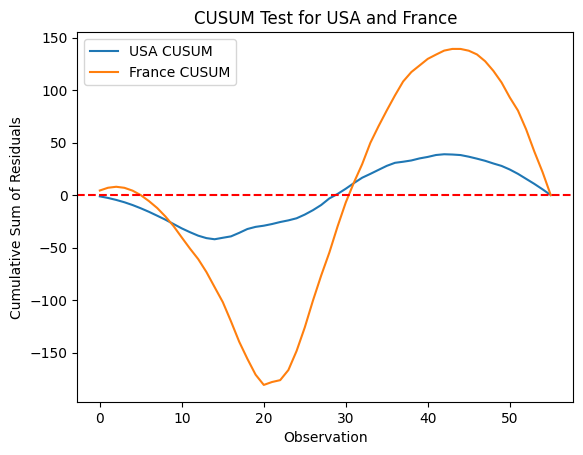

In [10]:
# График  США
plt.plot(cumulative_sum, label='USA CUSUM')

# График  Франции
plt.plot(cumulative_sum_france, label='France CUSUM')

# Добавляем горизонтальную линию на уровне 0 для ориентира
plt.axhline(y=0, color='r', linestyle='--')

# Настраиваем график
plt.title('CUSUM Test for USA and France')
plt.xlabel('Observation')
plt.ylabel('Cumulative Sum of Residuals')
plt.legend()

# Отображаем график
plt.show()

In [35]:
import statsmodels.api as sm
from scipy.stats import f

# Определяем точку разрыва, например, 2008 год
breakpoint = 2000

# Отделяем данные для США до и после кризиса
usa_pre = df[df['Year'] < breakpoint]['USA']
usa_post = df[df['Year'] >= breakpoint]['USA']
years_pre = df[df['Year'] < breakpoint]['Year']
years_post = df[df['Year'] >= breakpoint]['Year']

# Регрессия для всего периода
X_full = sm.add_constant(df['Year'])
y_full = df['USA']
model_full = sm.OLS(y_full, X_full).fit()

# Регрессия для периода до кризиса
X_pre = sm.add_constant(years_pre)
y_pre = usa_pre
model_pre = sm.OLS(y_pre, X_pre).fit()

# Регрессия для периода после кризиса
X_post = sm.add_constant(years_post)
y_post = usa_post
model_post = sm.OLS(y_post, X_post).fit()

# Вычисляем сумму квадратов ошибок для каждой модели
ssr_full = model_full.ssr
ssr_pre = model_pre.ssr
ssr_post = model_post.ssr

# Вычисляем F-статистику для теста Чоу
n = len(y_full)  # Общее количество наблюдений
k = 2  # Количество независимых переменных (включая константу)
F = ((ssr_full - (ssr_pre + ssr_post)) / k) / ((ssr_pre + ssr_post) / (n - 2*k))

# Получаем p-value
p_value = 1 - f.cdf(F, k, n - 2*k)
print("USA F-statistic:", F)
print("USA p-value:", p_value)

# Теперь можно повторить те же шаги для данных по Франции
france_pre = df[df['Year'] < breakpoint]['France']
france_post = df[df['Year'] >= breakpoint]['France']

y_full = df['France']
model_full = sm.OLS(y_full, X_full).fit()
y_pre = france_pre
model_pre = sm.OLS(y_pre, X_pre).fit()
y_post = france_post
model_post = sm.OLS(y_post, X_post).fit()

ssr_full = model_full.ssr
ssr_pre = model_pre.ssr
ssr_post = model_post.ssr
F = ((ssr_full - (ssr_pre + ssr_post)) / k) / ((ssr_pre + ssr_post) / (n - 2*k))
p_value = 1 - f.cdf(F, k, n - 2*k)
print("France F-statistic:", F)
print("France p-value:", p_value)


USA F-statistic: 74.92398497871204
USA p-value: 8.881784197001252e-16
France F-statistic: 38.49598690994497
France p-value: 7.583034200564498e-11


## 4.1

Для выявления стационарности ряда будем использовать следующие тесты единичного корня:

1. Тест Дики-Фуллера (Dickey-Fuller test)
2. Тест Филлипса-Перрона (Phillips-Perron test)
3. Тест Квятковского-Филлипса-Шмидта-Шина (KPSS test)



In [12]:
from statsmodels.tsa.stattools import adfuller
from arch.unitroot import PhillipsPerron
from statsmodels.tsa.stattools import kpss

# Функция для проведения теста ADF без учета тренда
def adf_test_without_trend(series, country):
    result = adfuller(series)
    print(f"Тест ADF для {country} без учета тренда:")
    print(f"ADF Statistic: {result[0]}")
    print(f"p-value: {result[1]}")
    print("Critical Values:")
    for key, value in result[4].items():
        print(f"\t{key}: {value}")
    if result[1] > 0.05:
        print(f"Ряд {country} нестационарен, согласно тесту ADF без учета тренда")
    else:
        print(f"Ряд {country} стационарен, согласно тесту ADF без учета тренда")
    print()

# Функция для проведения теста ADF с учетом тренда
def adf_test_with_trend(series, country):
    result = adfuller(series, regression='ct')
    print(f"Тест ADF для {country} с учетом тренда:")
    print(f"ADF Statistic: {result[0]}")
    print(f"p-value: {result[1]}")
    print("Critical Values:")
    for key, value in result[4].items():
        print(f"\t{key}: {value}")
    if result[1] > 0.05:
        print(f"Ряд {country} нестационарен, согласно тесту ADF с учетом тренда")
    else:
        print(f"Ряд {country} стационарен, согласно тесту ADF с учетом тренда")
    print()

# Функция для проведения теста Phillips-Perron без учета тренда
def pp_test_without_trend(series, country):
    pp_test = PhillipsPerron(series, trend='n')
    print(f"Тест Phillips-Perron для {country} без учета тренда:")
    print(pp_test.summary())
    if pp_test.pvalue > 0.05:
        print(f"Ряд {country} нестационарен, согласно тесту Phillips-Perron без учета тренда")
    else:
        print(f"Ряд {country} стационарен, согласно тесту Phillips-Perron без учета тренда")
    print()

# Функция для проведения теста Phillips-Perron с учетом тренда
def pp_test_with_trend(series, country):
    pp_test = PhillipsPerron(series, trend='ct')
    print(f"Тест Phillips-Perron для {country} с учетом тренда:")
    print(pp_test.summary())
    if pp_test.pvalue > 0.05:
        print(f"Ряд {country} нестационарен, согласно тесту Phillips-Perron с учетом тренда")
    else:
        print(f"Ряд {country} стационарен, согласно тесту Phillips-Perron с учетом тренда")
    print()

# Функция для проведения теста KPSS без учета тренда
def kpss_test_without_trend(series, country):
    print(f"Тест KPSS для {country} без учета тренда:")
    statistic, p_value, n_lags, critical_values = kpss(series, regression='c')
    print(f"KPSS Статистика: {statistic}")
    print(f"p-value: {p_value}")
    print("Критические значения:")
    for key, value in critical_values.items():
        print(f"\t{key}: {value}")
    if p_value < 0.05:
        print(f"Вероятность того, что временной ряд {country} не содержит единичный корень и является стационарным, низкая.")
    else:
        print(f"Вероятность того, что временной ряд {country} не содержит единичный корень и является стационарным, высокая.")
    print()

# Функция для проведения теста KPSS с учетом тренда
def kpss_test_with_trend(series, country):
    print(f"Тест KPSS для {country} с учетом тренда:")
    statistic, p_value, n_lags, critical_values = kpss(series, regression='ct')
    print(f"KPSS Статистика: {statistic}")
    print(f"p-value: {p_value}")
    print("Критические значения:")
    for key, value in critical_values.items():
        print(f"\t{key}: {value}")
    if p_value < 0.05:
        print(f"Вероятность того, что временной ряд {country} не содержит единичный корень и является стационарным, низкая.")
    else:
        print(f"Вероятность того, что временной ряд {country} не содержит единичный корень и является стационарным, высокая.")
    print()

# Применяем тесты без учета тренда для каждой страны/региона
print('Результаты тестов без учета тренда:')
adf_test_without_trend(df['USA'], 'США')
pp_test_without_trend(df['USA'], 'США')
kpss_test_without_trend(df['USA'], 'США')

adf_test_without_trend(df['France'], 'Франции')
pp_test_without_trend(df['France'], 'Франции')
kpss_test_without_trend(df['France'], 'Франции')

# Применяем тесты с учетом тренда для каждой страны/региона
print('\nРезультаты тестов с учетом тренда:')
adf_test_with_trend(df['USA'], 'США')
pp_test_with_trend(df['USA'], 'США')
kpss_test_with_trend(df['USA'], 'США')

adf_test_with_trend(df['France'], 'Франции')
pp_test_with_trend(df['France'], 'Франции')
kpss_test_with_trend(df['France'], 'Франции')


Результаты тестов без учета тренда:
Тест ADF для США без учета тренда:
ADF Statistic: -1.773907688753357
p-value: 0.39349056355786605
Critical Values:
	1%: -3.5552728880540942
	5%: -2.9157312396694217
	10%: -2.5956695041322315
Ряд США нестационарен, согласно тесту ADF без учета тренда

Тест Phillips-Perron для США без учета тренда:
     Phillips-Perron Test (Z-tau)    
Test Statistic                  0.647
P-value                         0.856
Lags                               11
-------------------------------------

Trend: No Trend
Critical Values: -2.61 (1%), -1.95 (5%), -1.61 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.
Ряд США нестационарен, согласно тесту Phillips-Perron без учета тренда

Тест KPSS для США без учета тренда:
KPSS Статистика: 1.0596536578206779
p-value: 0.01
Критические значения:
	10%: 0.347
	5%: 0.463
	2.5%: 0.574
	1%: 0.739
Вероятность того, что временной ряд США не содержит единичный корень и

/var/folders/83/4cpt7wtj7klgynj87_19cbgw0000gn/T/ipykernel_35311/2926353958.py:60: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  statistic, p_value, n_lags, critical_values = kpss(series, regression='c')
/var/folders/83/4cpt7wtj7klgynj87_19cbgw0000gn/T/ipykernel_35311/2926353958.py:60: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  statistic, p_value, n_lags, critical_values = kpss(series, regression='c')
/var/folders/83/4cpt7wtj7klgynj87_19cbgw0000gn/T/ipykernel_35311/2926353958.py:75: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  statistic, p_value, n_lags, critical_values = kpss(series, regression='ct')


In [13]:
#Метод последовательных разностей
df['dUSA'] = df['USA'].diff().dropna()
df['dFrance'] = df['France'].diff().dropna()
df = df.dropna()

df['ddFrance'] = df['dFrance'].diff().dropna()
df = df.dropna()

In [14]:
# Применяем тесты без учета тренда для каждой страны/региона после последовательных разностей 
print('Результаты тестов без учета тренда:')
adf_test_without_trend(df['dUSA'], 'США')
pp_test_without_trend(df['dUSA'], 'США')
kpss_test_without_trend(df['dUSA'], 'США')

adf_test_without_trend(df['ddFrance'], 'Франции')
pp_test_without_trend(df['ddFrance'], 'Франции')
kpss_test_without_trend(df['ddFrance'], 'Франции')

# Применяем тесты с учетом тренда для каждой страны/региона после последовательных разностей 
print('\nРезультаты тестов с учетом тренда:')
adf_test_with_trend(df['dUSA'], 'США')
pp_test_with_trend(df['dUSA'], 'США')
kpss_test_with_trend(df['dUSA'], 'США')

adf_test_with_trend(df['ddFrance'], 'Франции')
pp_test_with_trend(df['ddFrance'], 'Франции')
kpss_test_with_trend(df['ddFrance'], 'Франции')

Результаты тестов без учета тренда:
Тест ADF для США без учета тренда:
ADF Statistic: -5.756970885837683
p-value: 5.789532100862092e-07
Critical Values:
	1%: -3.560242358792829
	5%: -2.9178502070837
	10%: -2.5967964150943397
Ряд США стационарен, согласно тесту ADF без учета тренда

Тест Phillips-Perron для США без учета тренда:
     Phillips-Perron Test (Z-tau)    
Test Statistic                 -5.956
P-value                         0.000
Lags                               11
-------------------------------------

Trend: No Trend
Critical Values: -2.61 (1%), -1.95 (5%), -1.61 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.
Ряд США стационарен, согласно тесту Phillips-Perron без учета тренда

Тест KPSS для США без учета тренда:
KPSS Статистика: 0.4358826398942862
p-value: 0.061688517286945604
Критические значения:
	10%: 0.347
	5%: 0.463
	2.5%: 0.574
	1%: 0.739
Вероятность того, что временной ряд США не содержит единичны

/var/folders/83/4cpt7wtj7klgynj87_19cbgw0000gn/T/ipykernel_35311/2926353958.py:60: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  statistic, p_value, n_lags, critical_values = kpss(series, regression='c')
/var/folders/83/4cpt7wtj7klgynj87_19cbgw0000gn/T/ipykernel_35311/2926353958.py:75: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  statistic, p_value, n_lags, critical_values = kpss(series, regression='ct')


## 4.2

#### подбор параметров вручную для каждой страны

In [114]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX


# Моделирование для Франции
model_arima_323_france = ARIMA(df['France'][:-6], order=(3, 2, 3))
results_arima_323_france = model_arima_323_france.fit()
print(results_arima_323_france.summary())


model_arima_221_france = ARIMA(df['France'][:-3], order=(2, 2, 1))
results_arima_221_france = model_arima_221_france.fit()
print(results_arima_221_france.summary())


model_arima_120_france = ARIMA(df['France'][:-6], order=(1, 2, 0))
results_arima_120_france = model_arima_120_france.fit()
print(results_arima_120_france.summary())

# Моделирование для США

model_arima_111_usa = ARIMA(df['USA'][:-6], order=(1, 1, 1))
results_arima_111_usa = model_arima_111_usa.fit()
print(results_arima_111_usa.summary())

model_arima_110_usa = ARIMA(df['USA'][:-6], order=(1, 1, 0))
results_arima_110_usa = model_arima_110_usa.fit()
print(results_arima_110_usa.summary())


model_arima_313_usa = ARIMA(df['USA'][:-6], order=(3, 1, 3))
results_arima_313_usa = model_arima_313_usa.fit()
print(results_arima_313_usa.summary())


                               SARIMAX Results                                
Dep. Variable:                 France   No. Observations:                   48
Model:                 ARIMA(3, 2, 3)   Log Likelihood                -112.678
Date:                Thu, 11 Apr 2024   AIC                            239.356
Time:                        20:54:18   BIC                            252.156
Sample:                             0   HQIC                           244.151
                                 - 48                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2304      0.998     -0.231      0.818      -2.187       1.727
ar.L2         -0.2155      0.319     -0.676      0.499      -0.841       0.409
ar.L3         -0.0724      0.490     -0.148      0.8

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.frame

In [116]:
import numpy as np
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA


# Создание переменной для детерминированного тренда
df['Deterministic_Trend'] = np.arange(len(df))

# Создание фиктивной переменной для структурного сдвига
df['Dummy_Shock'] = 0
break_point = 2000
df.loc[df.index >= break_point, 'Dummy_Shock'] = 1

# Моделирование ARIMA с детерминированным трендом для USA
model_arima_deterministic_trend_usa = ARIMA(df['USA'][:-3], order=(1, 1, 0), exog=df['Deterministic_Trend'][:-3])
results_arima_deterministic_trend_usa = model_arima_deterministic_trend_usa.fit()
print(results_arima_deterministic_trend_usa.summary())

# Моделирование ARIMA с детерминированным трендом для France
model_arima_deterministic_trend_france = ARIMA(df['France'], order=(1, 2, 0), exog=df[['Deterministic_Trend']])
results_arima_deterministic_trend_france = model_arima_deterministic_trend_france.fit()
print(results_arima_deterministic_trend_france.summary())

# Моделирование ARIMA с фиктивной переменной для структурного сдвига для USA
model_arima_dummy_shock_usa = ARIMA(df['USA'], order=(1, 1, 0), exog=df[['Dummy_Shock']])
results_arima_dummy_shock_usa = model_arima_dummy_shock_usa.fit()
print(results_arima_dummy_shock_usa.summary())

# Моделирование ARIMA с фиктивной переменной для структурного сдвига для France
model_arima_dummy_shock_france = ARIMA(df['France'], order=(1, 2, 0), exog=df[['Dummy_Shock']])
results_arima_dummy_shock_france = model_arima_dummy_shock_france.fit()
print(results_arima_dummy_shock_france.summary())


                               SARIMAX Results                                
Dep. Variable:                    USA   No. Observations:                   51
Model:                 ARIMA(1, 1, 0)   Log Likelihood                 -65.029
Date:                Thu, 11 Apr 2024   AIC                            136.058
Time:                        20:54:28   BIC                            141.794
Sample:                             0   HQIC                           138.242
                                 - 51                                         
Covariance Type:                  opg                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Deterministic_Trend     0.3652      0.169      2.158      0.031       0.034       0.697
ar.L1                   0.2085      0.137      1.517      0.129      -0.061       0.478
sigma2          

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.frame

## 4.4

Анализ остатков для France_323


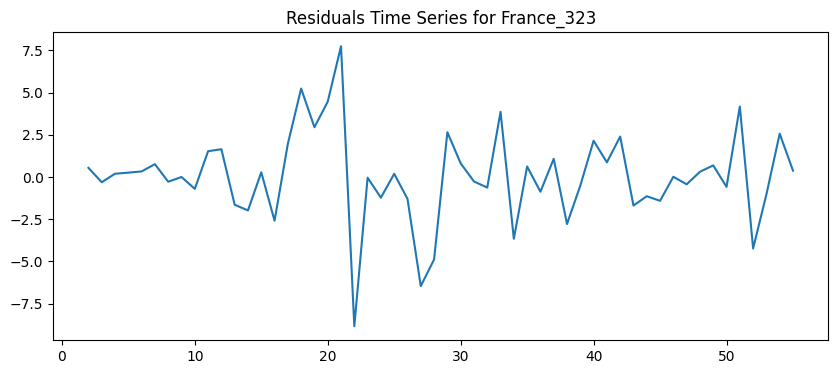

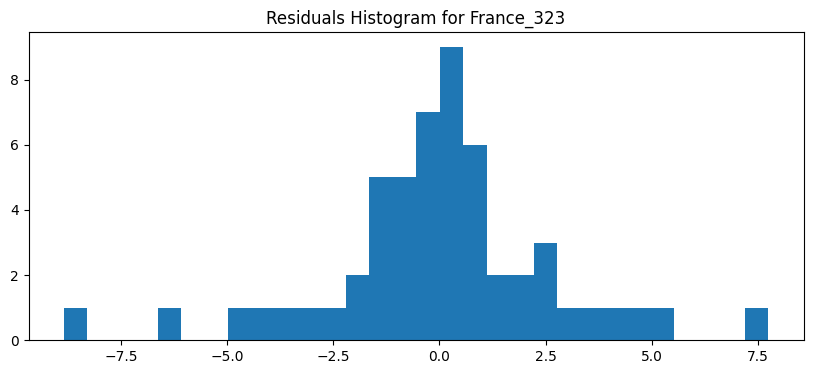

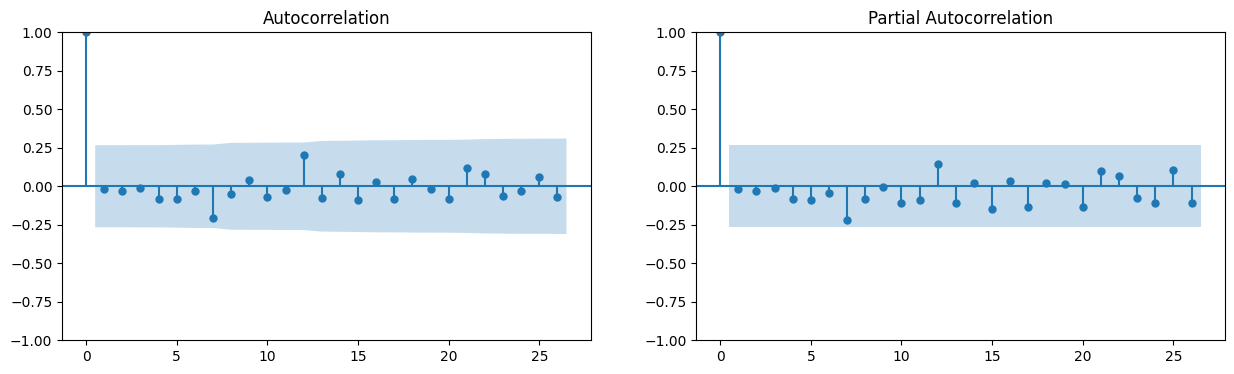

Test Ljung-Box, p-value: l 

Test Jarque-Bera, p-value: 0.005134938901530311 

Skew: -0.3399501002786361 
Kurtosis: 5.055159364688678 

Анализ остатков для France_221


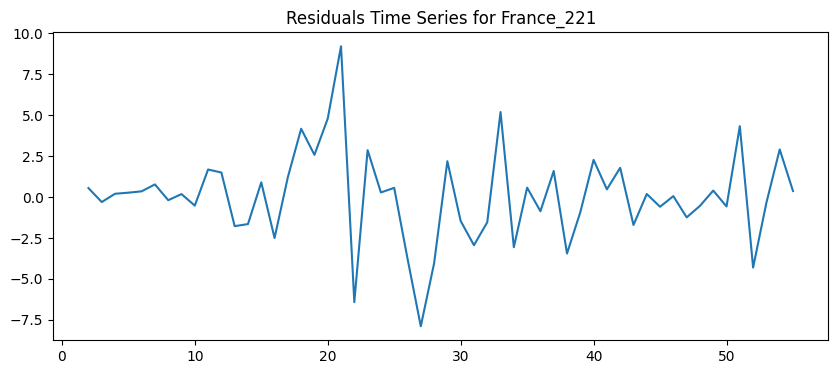

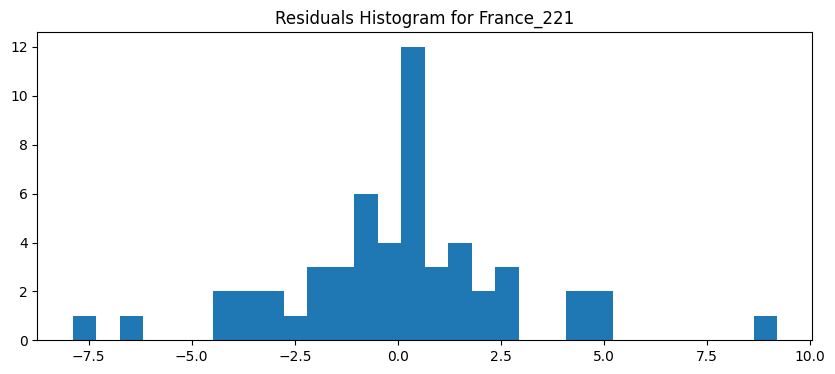

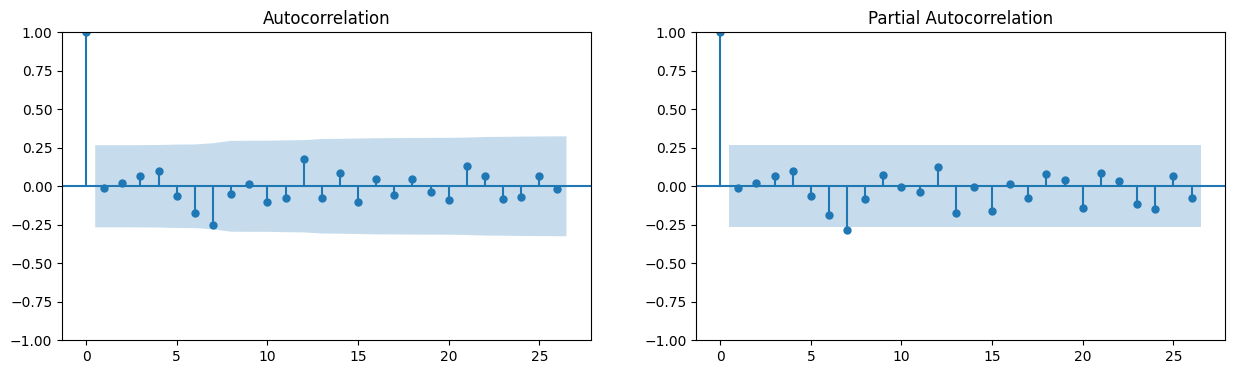

Test Ljung-Box, p-value: l 

Test Jarque-Bera, p-value: 0.025136245498909898 

Skew: 0.13307799891602592 
Kurtosis: 4.789785968237413 

Анализ остатков для France_120


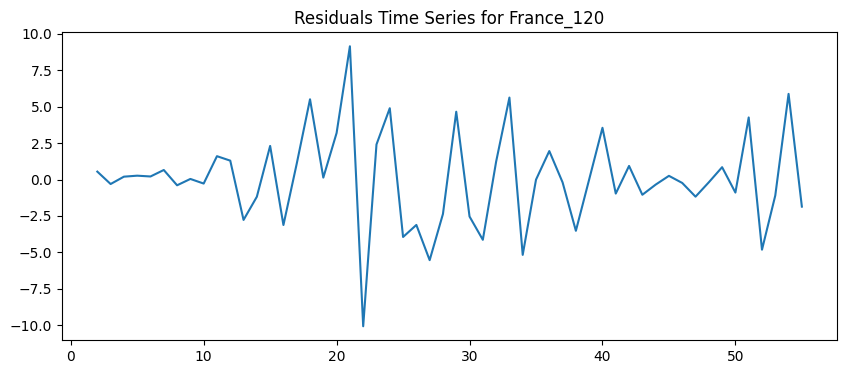

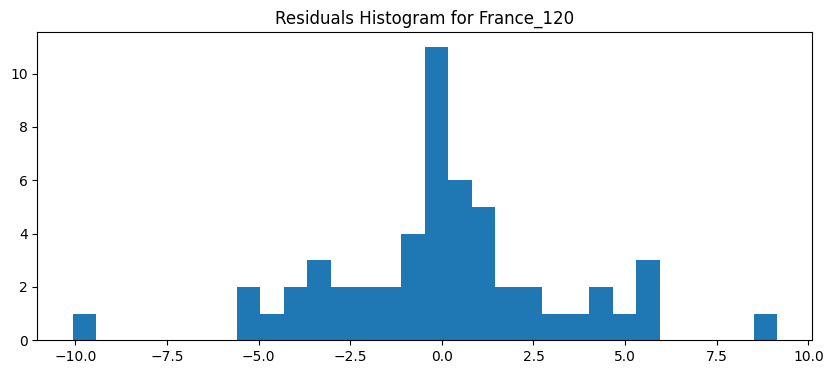

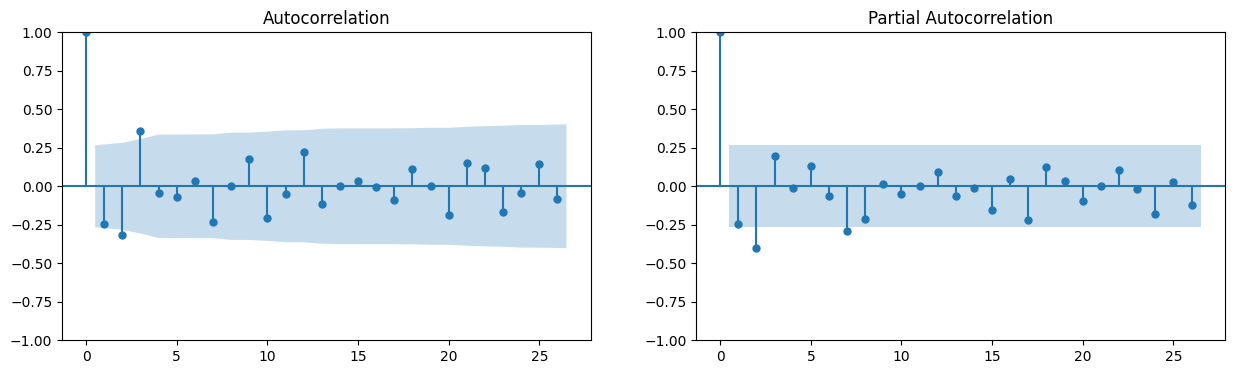

Test Ljung-Box, p-value: l 

Test Jarque-Bera, p-value: 0.17632626809238774 

Skew: -0.02991638124223695 
Kurtosis: 4.240570388427598 

Анализ остатков для USA_111


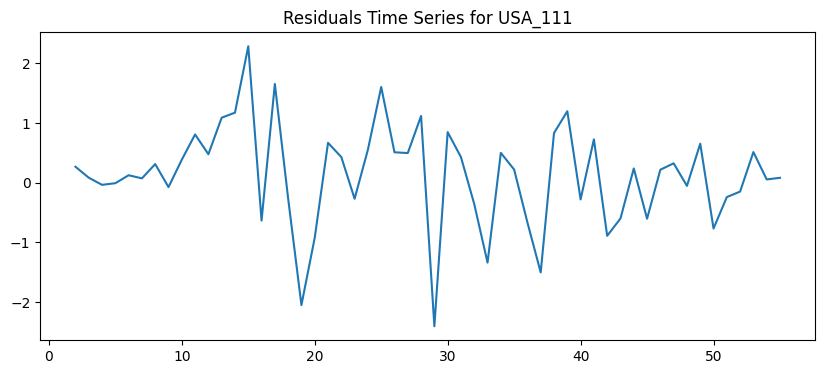

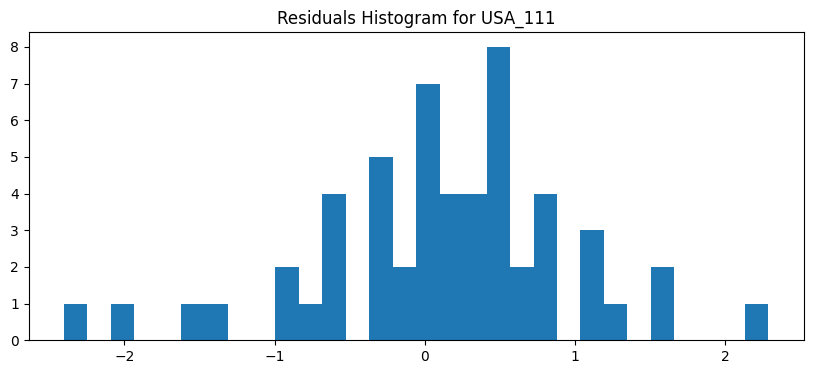

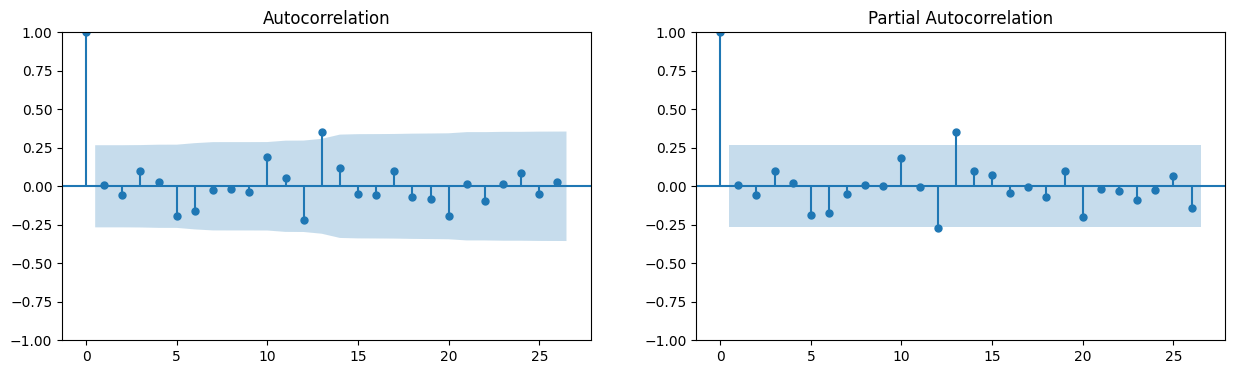

Test Ljung-Box, p-value: l 

Test Jarque-Bera, p-value: 0.08870250325476922 

Skew: -0.47786680075360727 
Kurtosis: 4.113497836867271 

Анализ остатков для USA_110


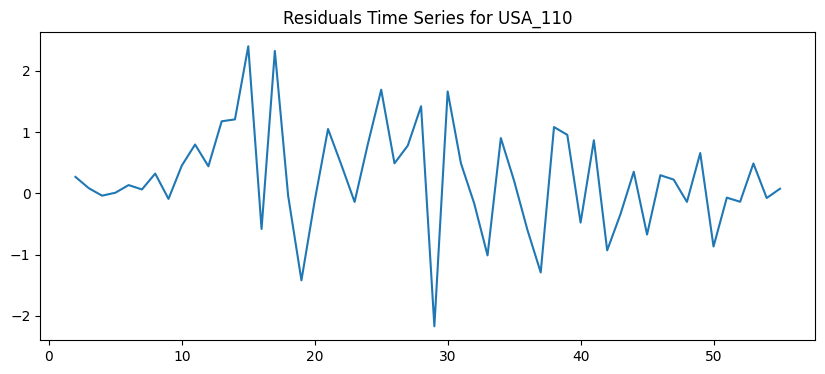

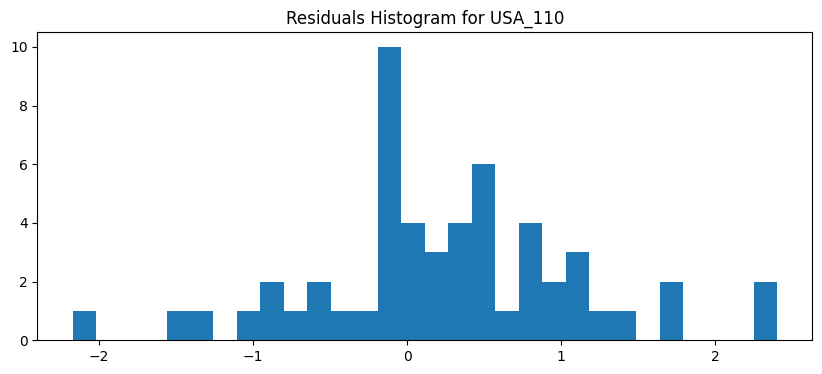

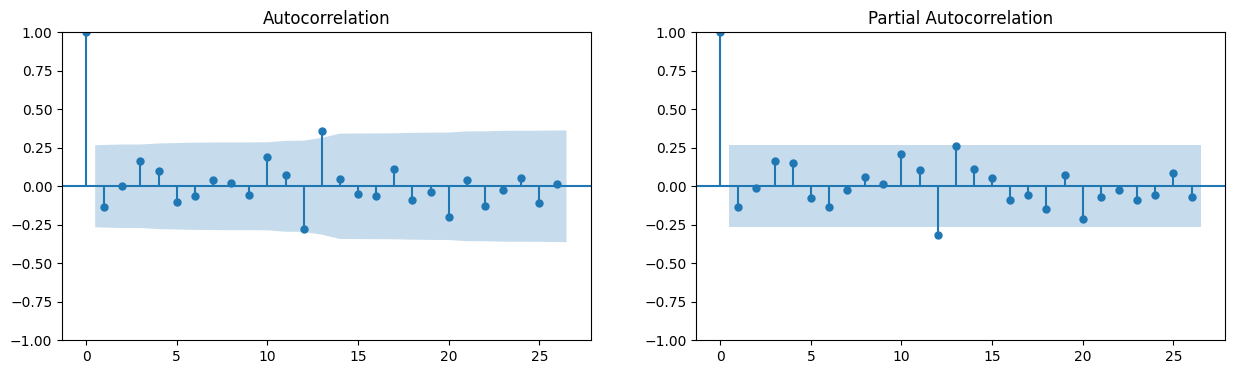

Test Ljung-Box, p-value: l 

Test Jarque-Bera, p-value: 0.575104847776992 

Skew: 0.013729247545383925 
Kurtosis: 3.7007010430994307 

Анализ остатков для USA_313


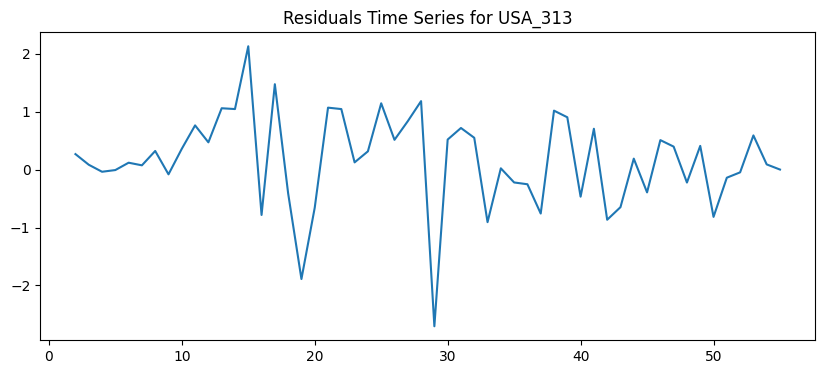

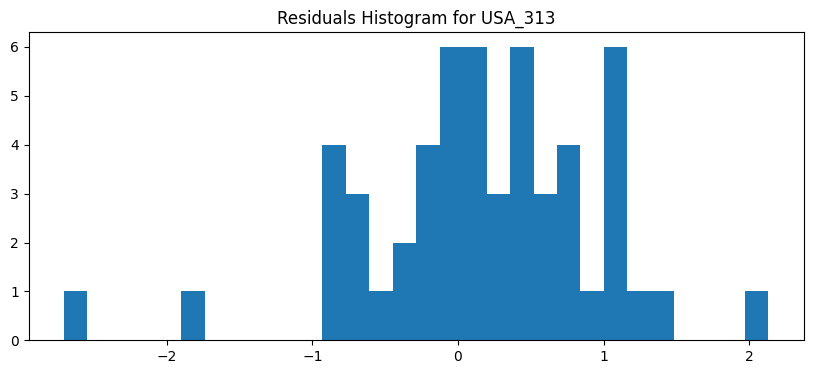

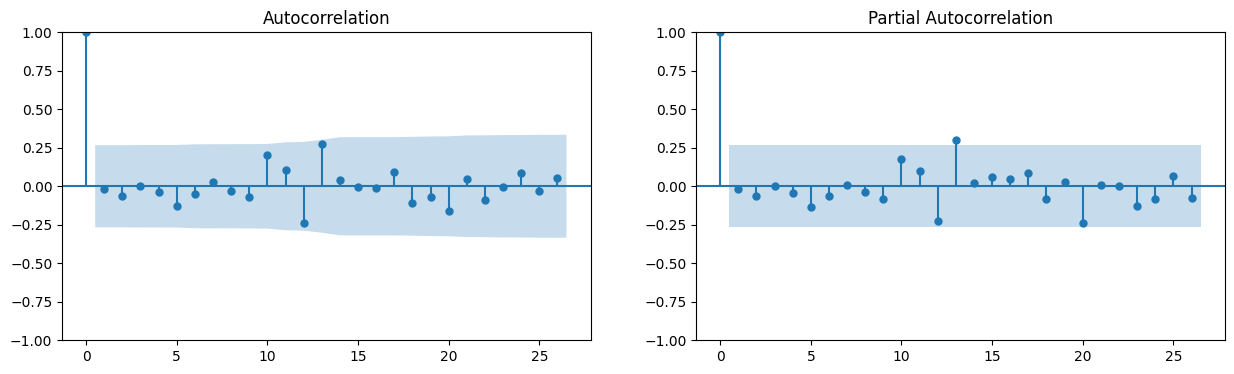

Test Ljung-Box, p-value: l 

Test Jarque-Bera, p-value: 0.00048138451736632145 

Skew: -0.7797680091862863 
Kurtosis: 5.087565839949139 

Анализ остатков для USA_deterministic_trend


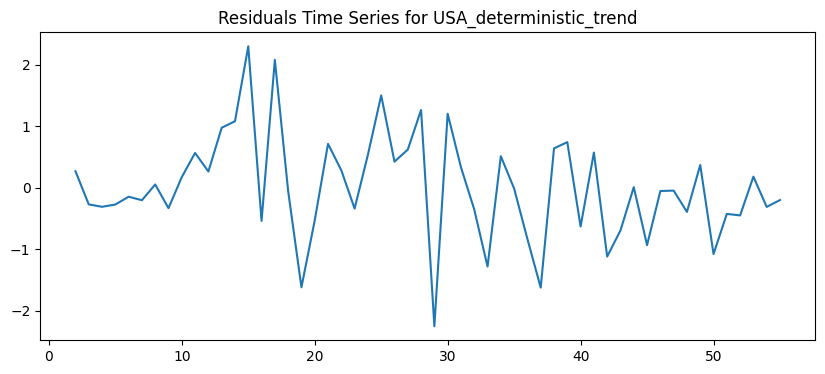

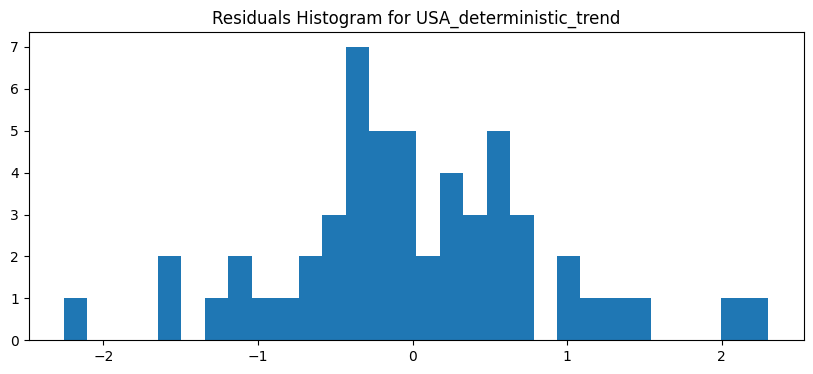

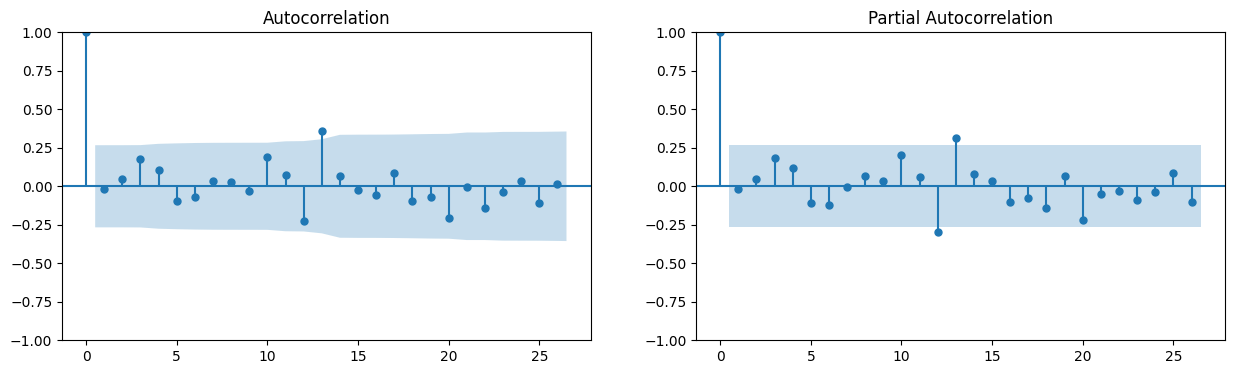

Test Ljung-Box, p-value: l 

Test Jarque-Bera, p-value: 0.5375728767742374 

Skew: 0.13028706996059963 
Kurtosis: 3.695576308317838 

Анализ остатков для France_deterministic_trend


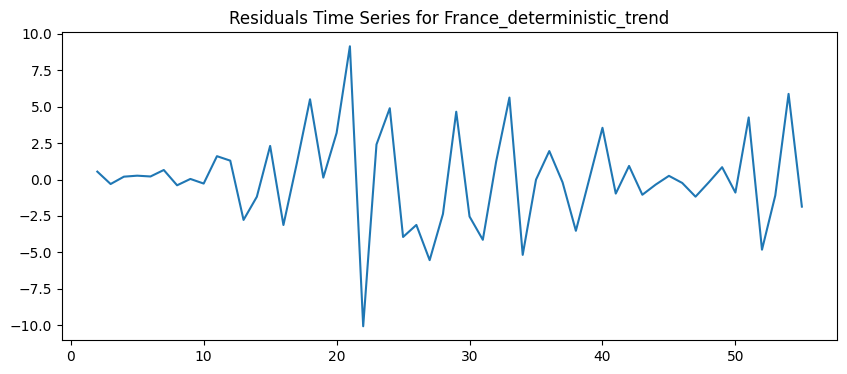

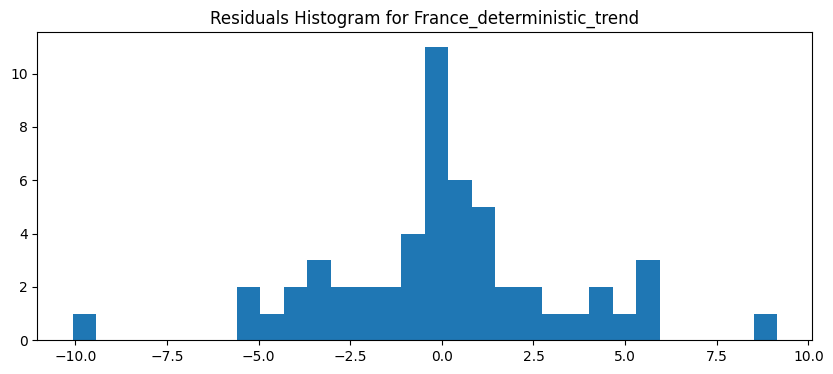

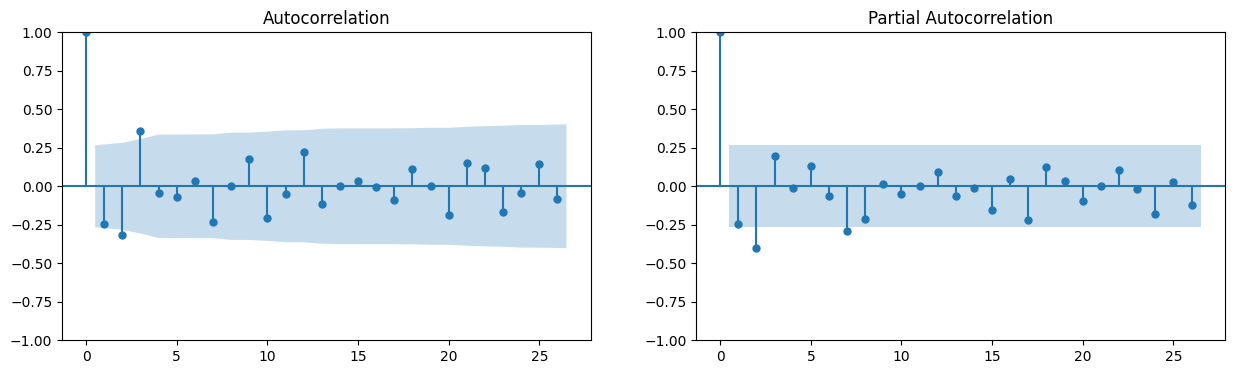

Test Ljung-Box, p-value: l 

Test Jarque-Bera, p-value: 0.17632630205609234 

Skew: -0.029916295554312067 
Kurtosis: 4.240570327685902 

Анализ остатков для USA_dummy_shock


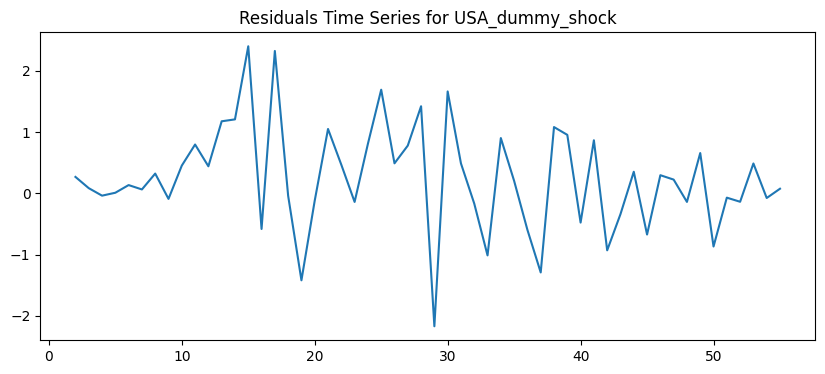

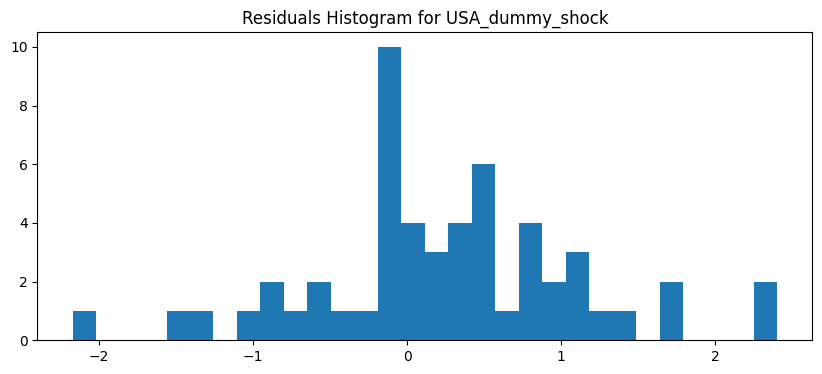

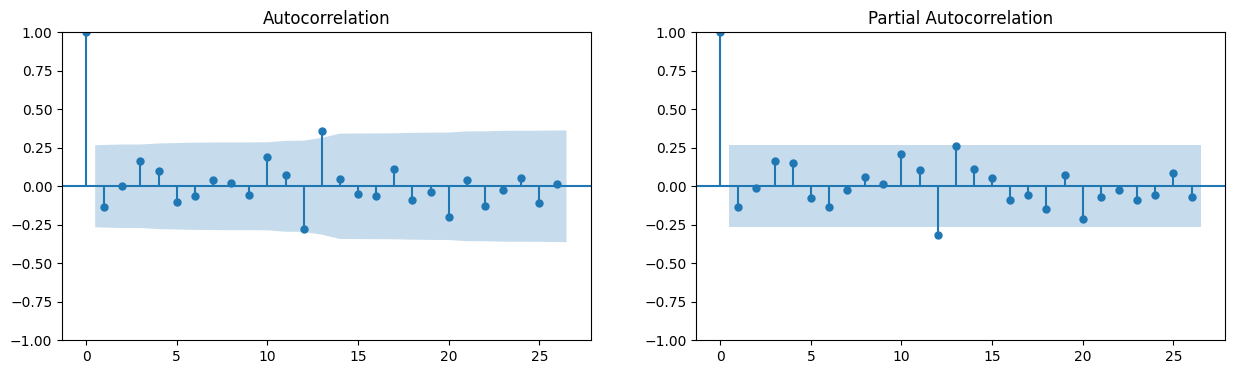

Test Ljung-Box, p-value: l 

Test Jarque-Bera, p-value: 0.5751053252924945 

Skew: 0.01372584894128532 
Kurtosis: 3.7007007827762957 

Анализ остатков для France_dummy_shock


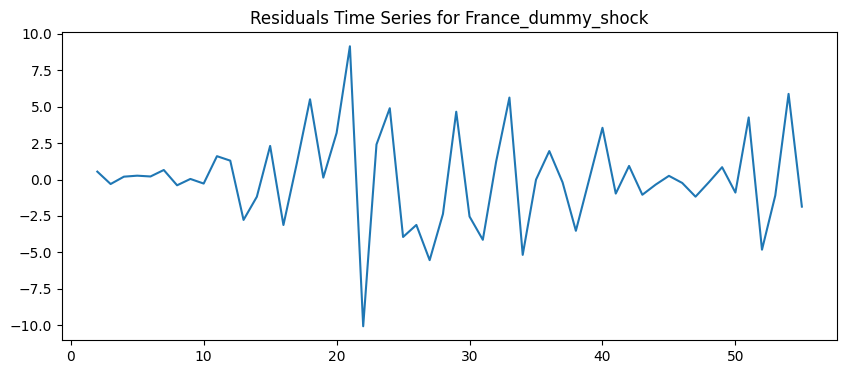

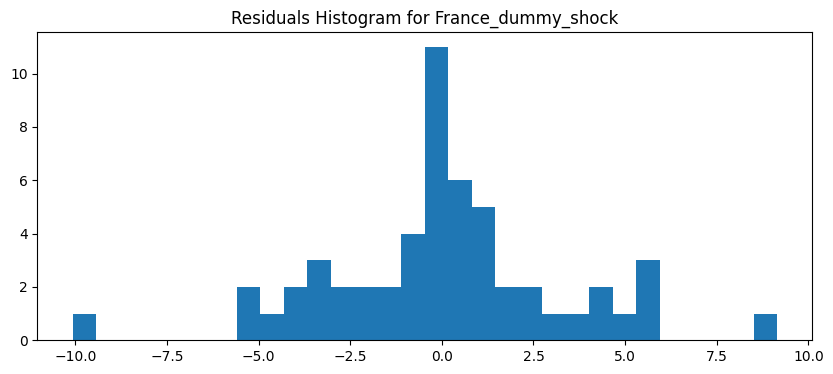

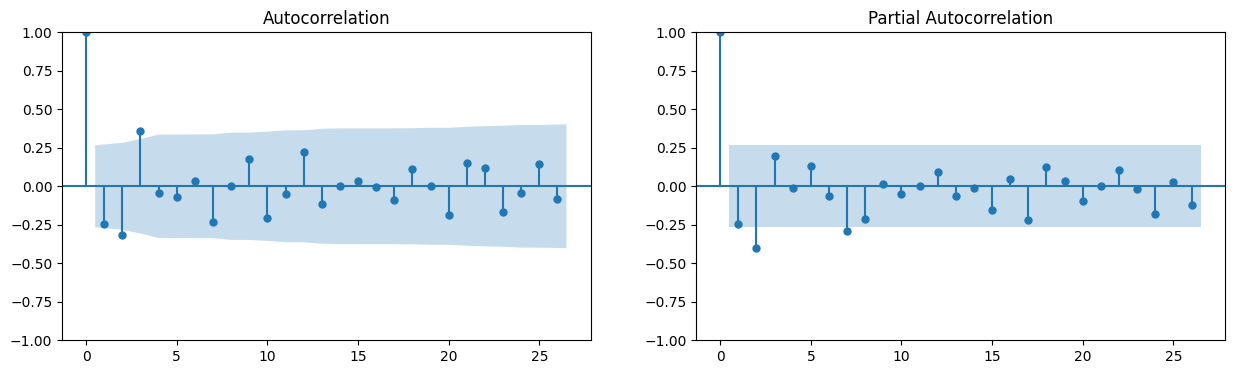

Test Ljung-Box, p-value: l 

Test Jarque-Bera, p-value: 0.17632628585321733 

Skew: -0.029916336472687852 
Kurtosis: 4.2405703566597746 



In [17]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

def analyze_residuals(residuals, title):
    print(f"Анализ остатков для {title}")
    
    # Построим график остатков
    plt.figure(figsize=(10, 4))
    plt.plot(residuals)
    plt.title(f'Residuals Time Series for {title}')
    plt.show()

    # Построим гистограмму остатков
    plt.figure(figsize=(10, 4))
    plt.hist(residuals, bins=30)
    plt.title(f'Residuals Histogram for {title}')
    plt.show()

    # ACF и PACF
    fig, ax = plt.subplots(1, 2, figsize=(15, 4))
    sm.graphics.tsa.plot_acf(residuals, lags=26, ax=ax[0])
    sm.graphics.tsa.plot_pacf(residuals, lags=26, ax=ax[1])
    plt.show()

    # Тест Льюнга-Бокса
    lb_value, lb_pvalue = sm.stats.acorr_ljungbox(residuals, lags=[10], return_df=False)
    print(f'Test Ljung-Box, p-value: {lb_pvalue[0]} \n')

    # Тест на нормальность (Жарка-Бера)
    jb_value, jb_pvalue, skew, kurtosis = sm.stats.jarque_bera(residuals)
    print(f'Test Jarque-Bera, p-value: {jb_pvalue} \n')
    print(f'Skew: {skew} \nKurtosis: {kurtosis} \n')

# Результаты моделей ARIMA для каждой страны
results_arima = {
    'France_323': results_arima_323_france,
    'France_221': results_arima_221_france,
    'France_120': results_arima_120_france,
    'USA_111': results_arima_111_usa,
    'USA_110': results_arima_110_usa,
    'USA_313': results_arima_313_usa,
    'USA_deterministic_trend': results_arima_deterministic_trend_usa,
    'France_deterministic_trend': results_arima_deterministic_trend_france,
    'USA_dummy_shock': results_arima_dummy_shock_usa,
    'France_dummy_shock': results_arima_dummy_shock_france
}

# Анализ остатков для каждой модели
for model_name, model_results in results_arima.items():
    residuals = model_results.resid
    analyze_residuals(residuals, model_name)


In [18]:
from statsmodels.tsa.stattools import adfuller

# Функция для проведения теста Дики-Фуллера и вывода результатов
def adf_test(residuals, model_name):
    adf_result = adfuller(residuals)
    print(f"Результаты теста Дики-Фуллера для модели {model_name}:")
    print('ADF Statistic: %f' % adf_result[0])
    print('p-value: %f' % adf_result[1])
    print('Critical Values:')
    for key, value in adf_result[4].items():
        print('\t%s: %.3f' % (key, value))
    print()

# Применяем тест Дики-Фуллера для каждой модели
adf_test(results_arima_323_france.resid, "ARIMA(3, 2, 3) для Франции")
adf_test(results_arima_221_france.resid, "ARIMA(2, 2, 1) для Франции")
adf_test(results_arima_120_france.resid, "ARIMA(1, 2, 0) для Франции")
adf_test(results_arima_111_usa.resid, "ARIMA(1, 1, 1) для США")
adf_test(results_arima_110_usa.resid, "ARIMA(1, 1, 0) для США")
adf_test(results_arima_313_usa.resid, "ARIMA(3, 1, 3) для США")
adf_test(results_arima_deterministic_trend_usa.resid, "ARIMA с детерминированным трендом для США")
adf_test(results_arima_deterministic_trend_france.resid, "ARIMA с детерминированным трендом для Франции")
adf_test(results_arima_dummy_shock_usa.resid, "ARIMA с фиктивными переменными для США")
adf_test(results_arima_dummy_shock_france.resid, "ARIMA с фиктивными переменными для Франции")


Результаты теста Дики-Фуллера для модели ARIMA(3, 2, 3) для Франции:
ADF Statistic: -7.285581
p-value: 0.000000
Critical Values:
	1%: -3.560
	5%: -2.918
	10%: -2.597

Результаты теста Дики-Фуллера для модели ARIMA(2, 2, 1) для Франции:
ADF Statistic: -7.243441
p-value: 0.000000
Critical Values:
	1%: -3.560
	5%: -2.918
	10%: -2.597

Результаты теста Дики-Фуллера для модели ARIMA(1, 2, 0) для Франции:
ADF Statistic: -4.229438
p-value: 0.000587
Critical Values:
	1%: -3.566
	5%: -2.920
	10%: -2.598

Результаты теста Дики-Фуллера для модели ARIMA(1, 1, 1) для США:
ADF Statistic: -7.074733
p-value: 0.000000
Critical Values:
	1%: -3.560
	5%: -2.918
	10%: -2.597

Результаты теста Дики-Фуллера для модели ARIMA(1, 1, 0) для США:
ADF Statistic: -8.152233
p-value: 0.000000
Critical Values:
	1%: -3.560
	5%: -2.918
	10%: -2.597

Результаты теста Дики-Фуллера для модели ARIMA(3, 1, 3) для США:
ADF Statistic: -7.286436
p-value: 0.000000
Critical Values:
	1%: -3.560
	5%: -2.918
	10%: -2.597

Результаты

#### автоматический подбор параметров

In [19]:
from pmdarima import auto_arima
import pandas as pd

# Подбор оптимальной модели ARIMA
auto_arima_usa = auto_arima(df['USA'], start_p=0, start_q=0,
                             max_p=5, max_d=5, max_q=5, m=12,
                             seasonal=True, trace=True, error_action='ignore',
                             suppress_warnings=True, stepwise=True)

# Отображение оптимальных параметров для временного ряда США
print("Оптимальные параметры для временного ряда США:", auto_arima_usa.summary())


Performing stepwise search to minimize aic
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=144.135, Time=0.35 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=141.371, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=139.691, Time=0.05 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=140.609, Time=0.11 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=147.479, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=141.002, Time=0.04 sec
 ARIMA(1,1,0)(2,0,0)[12] intercept   : AIC=141.497, Time=0.17 sec
 ARIMA(1,1,0)(1,0,1)[12] intercept   : AIC=141.565, Time=0.07 sec
 ARIMA(1,1,0)(0,0,1)[12] intercept   : AIC=139.591, Time=0.04 sec
 ARIMA(1,1,0)(0,0,2)[12] intercept   : AIC=141.551, Time=0.06 sec
 ARIMA(1,1,0)(1,0,2)[12] intercept   : AIC=143.279, Time=0.54 sec
 ARIMA(0,1,0)(0,0,1)[12] intercept   : AIC=142.325, Time=0.03 sec
 ARIMA(2,1,0)(0,0,1)[12] intercept   : AIC=140.887, Time=0.06 sec
 ARIMA(1,1,1)(0,0,1)[12] intercept   : AIC=140.526, Time=0.05 sec
 ARIMA(2,1,1)(0,0,1)[12] intercep

In [20]:
from pmdarima import auto_arima

# Подбор оптимальных параметров для временного ряда Франции с учетом порядка интегрируемости
auto_arima_france = auto_arima(df['France'], seasonal=True, m=12, trace=True)

# Отображение оптимальных параметров для временного ряда
print("Оптимальные параметры для временного ряда Франции:", auto_arima_france.summary())
#AIC=267.161 

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=inf, Time=0.73 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=281.894, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=277.162, Time=0.06 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=279.466, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=289.152, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=276.276, Time=0.01 sec
 ARIMA(1,1,0)(0,0,1)[12] intercept   : AIC=276.836, Time=0.05 sec
 ARIMA(1,1,0)(1,0,1)[12] intercept   : AIC=inf, Time=0.15 sec
 ARIMA(2,1,0)(0,0,0)[12] intercept   : AIC=275.207, Time=0.04 sec
 ARIMA(2,1,0)(1,0,0)[12] intercept   : AIC=275.664, Time=0.05 sec
 ARIMA(2,1,0)(0,0,1)[12] intercept   : AIC=275.210, Time=0.04 sec
 ARIMA(2,1,0)(1,0,1)[12] intercept   : AIC=inf, Time=0.19 sec
 ARIMA(3,1,0)(0,0,0)[12] intercept   : AIC=268.182, Time=0.02 sec
 ARIMA(3,1,0)(1,0,0)[12] intercept   : AIC=268.909, Time=0.05 sec
 ARIMA(3,1,0)(0,0,1)[12] intercept   : AIC=26

In [21]:
# Подбор оптимальных параметров для временного ряда Франции с учетом порядка интегрируемости
auto_arima_france = auto_arima(df['France'], seasonal=True, m=12,d=2, trace=True)

# Отображение оптимальных параметров для временного ряда
print("Оптимальные параметры для временного ряда Франции:", auto_arima_france.summary())

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(1,0,1)[12]             : AIC=inf, Time=0.69 sec
 ARIMA(0,2,0)(0,0,0)[12]             : AIC=287.450, Time=0.01 sec
 ARIMA(1,2,0)(1,0,0)[12]             : AIC=275.615, Time=0.03 sec
 ARIMA(0,2,1)(0,0,1)[12]             : AIC=268.234, Time=0.06 sec
 ARIMA(0,2,1)(0,0,0)[12]             : AIC=268.102, Time=0.01 sec
 ARIMA(0,2,1)(1,0,0)[12]             : AIC=268.585, Time=0.04 sec
 ARIMA(0,2,1)(1,0,1)[12]             : AIC=inf, Time=0.28 sec
 ARIMA(1,2,1)(0,0,0)[12]             : AIC=269.462, Time=0.01 sec
 ARIMA(0,2,2)(0,0,0)[12]             : AIC=267.340, Time=0.02 sec
 ARIMA(0,2,2)(1,0,0)[12]             : AIC=267.504, Time=0.03 sec
 ARIMA(0,2,2)(0,0,1)[12]             : AIC=267.054, Time=0.09 sec
 ARIMA(0,2,2)(1,0,1)[12]             : AIC=inf, Time=0.43 sec
 ARIMA(0,2,2)(0,0,2)[12]             : AIC=267.933, Time=0.19 sec
 ARIMA(0,2,2)(1,0,2)[12]             : AIC=inf, Time=1.52 sec
 ARIMA(1,2,2)(0,0,1)[12]             : AIC=267.24

## 4.5

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


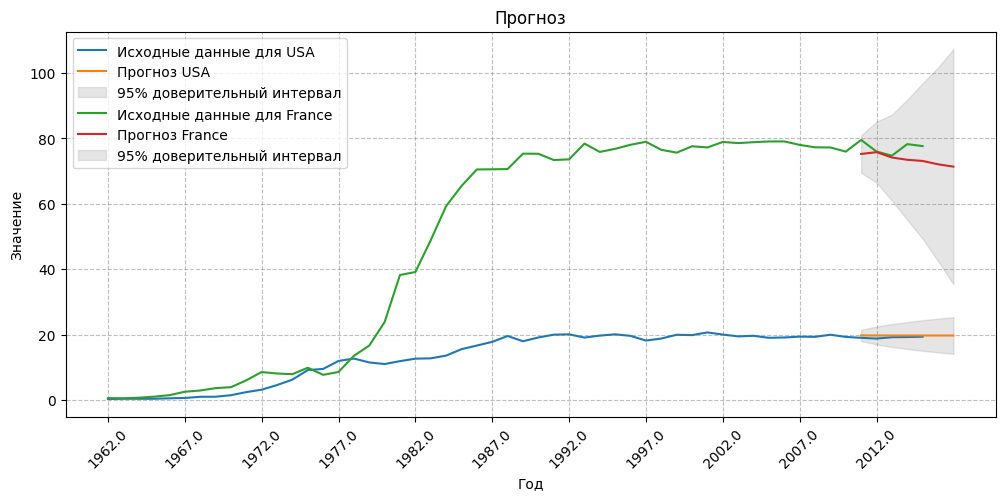

In [117]:
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
import numpy as np

def fit_arima_model(df, column, model, steps, exog=None):
    results = model.fit()
    forecast = results.get_forecast(steps=steps, exog=exog)  
    forecast_mean = forecast.predicted_mean
    forecast_ci = forecast.conf_int()
    
    # Визуализация фактических и прогнозируемых значений
    ax = df[column].plot(figsize=(12, 5), label=f'Исходные данные для {column}')
    forecast_mean.plot(ax=ax, label=f'Прогноз {column}')
    ax.fill_between(forecast_ci.index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='gray', alpha=0.2, label='95% доверительный интервал')
    ax.set_xlabel('Год') 
    ax.set_ylabel('Значение')
    ax.legend()
    ax.set_title('Прогноз')
    
  
    every_fifth_year = df['Year'].iloc[::5]  # Выбираем каждый пятый год
    ax.set_xticks(every_fifth_year.index)
    ax.set_xticklabels(every_fifth_year, rotation=45)  # Поворачиваем метки на 45 градусов

    # Добавляем сетку на задний план
    ax.grid(True, which='both', linestyle='--', color='gray', alpha=0.5)

# Задаем значения exog для прогноза 
exog_value = np.repeat(df['Deterministic_Trend'].values[-1], 7).reshape(-1, 1)

fit_arima_model(df, 'USA', model_arima_deterministic_trend_usa, steps=7, exog=exog_value)
fit_arima_model(df, 'France', model_arima_221_france, steps=7)
plt.show()  # Показываем графики


(51    19.730024
52    19.704282
53    19.698914
54    19.697795
55    19.697562
56    19.697513
57    19.697503
Name: predicted_mean, dtype: float64,     lower USA  upper USA
51  17.989623  21.470424
52  16.974301  22.434263
53  16.205978  23.191851
54  15.572578  23.823013
55  15.023305  24.371819
56  14.531959  24.863068
57  14.083427  25.311580)
(51    75.227544
52    75.770294
53    74.138064
54    73.443350
55    73.084509
56    72.063816
57    71.352569
Name: predicted_mean, dtype: float64,     lower France  upper France
51     69.514803     80.940285
52     66.442888     85.097700
53     60.992957     87.283170
54     55.069115     91.817585
55     49.281856     96.887162
56     42.489444    101.638187
57     35.386104    107.319034)


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


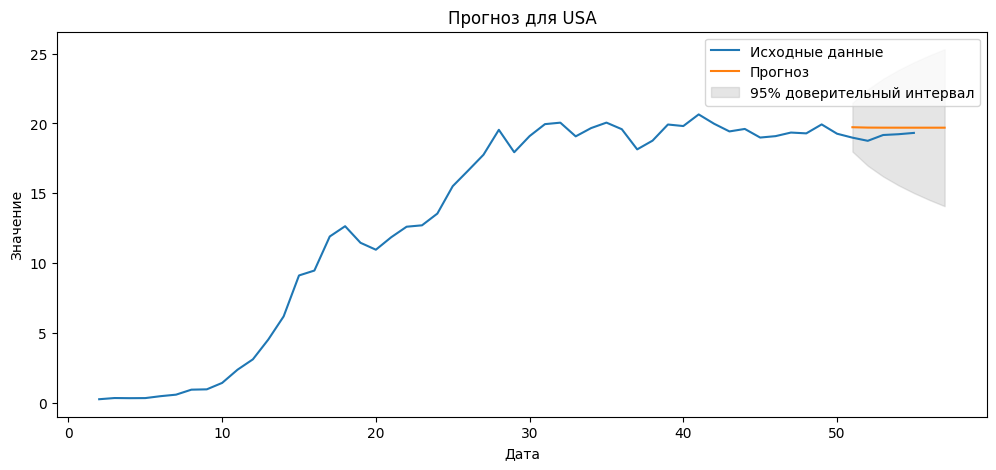

<Figure size 640x480 with 0 Axes>

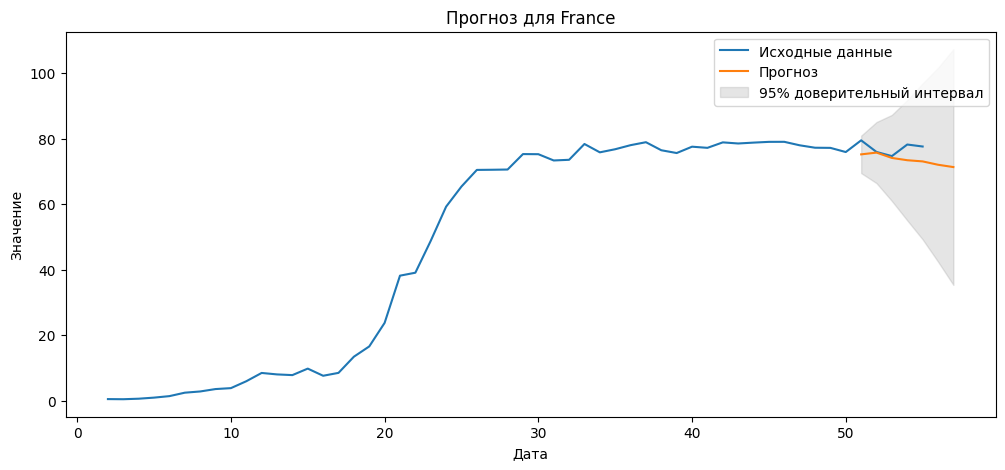

In [118]:
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
import numpy as np

def fit_arima_model(df, column, model, steps, exog=None):
    results = model.fit()
    forecast = results.get_forecast(steps=steps, exog=exog)  
    forecast_mean = forecast.predicted_mean
    forecast_ci = forecast.conf_int()
    
    # Создаем новое окно для графика
    plt.figure(figsize=(12, 5))
    
    # Визуализация фактических и прогнозируемых значений
    ax = df[column].plot(label='Исходные данные')
    forecast_mean.plot(ax=ax, label='Прогноз')
    ax.fill_between(forecast_ci.index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='gray', alpha=0.2, label='95% доверительный интервал')
    ax.set_xlabel('Дата')
    ax.set_ylabel('Значение')
    ax.legend()
    ax.set_title(f'Прогноз для {column}')
    
    return(forecast_mean, forecast_ci)

# Задаем значения exog для прогноза на 3 шага вперед
exog_value = np.repeat(df['Deterministic_Trend'].values[-1], 7).reshape(-1, 1)

# Создаем отдельное окно для каждого графика
first = fit_arima_model(df, 'USA', model_arima_deterministic_trend_usa, steps=7, exog=exog_value)
print(first)
plt.figure()  # Создаем новое окно для следующего графика
second = fit_arima_model(df, 'France', model_arima_221_france, steps=7)
print(second)


In [119]:
df.tail(5)

,Year,USA,France,dUSA,dFrance,ddFrance,Deterministic_Trend,Dummy_Shock,Forecast
51,2011.0,18.984846,79.511660,-0.281600,3.571134,4.842699,49,0,NaN
52,2012.0,18.757920,75.962780,-0.226926,-3.548880,-7.120014,50,0,NaN
53,2013.0,19.173831,74.704486,0.415911,-1.258294,2.290587,51,0,NaN
54,2014.0,19.230239,78.235588,0.056407,3.531102,4.789396,52,0,77.578895
55,2015.0,19.323778,77.627801,0.093539,-0.607787,-4.138889,53,0,79.171597


## 4.6

In [121]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.tools.eval_measures import rmse
from sklearn.metrics import r2_score

# Функция для оценки качества прогноза
def evaluate_forecast(actual_values, predicted_values):
    # Рассчитываем MSE
    mse = mean_squared_error(actual_values, predicted_values)

    # Рассчитываем MAE
    mae = mean_absolute_error(actual_values, predicted_values)

    # Рассчитываем RMSE
    root_mse = rmse(actual_values, predicted_values)

    # Рассчитываем R-squared
    r_squared = r2_score(actual_values, predicted_values)

    return mse, mae, root_mse, r_squared

## Фактические значения для США и Франции
actual_values_usa = df['USA'].iloc[-7:]
actual_values_france = df['France'].iloc[-7:]

# Предсказанные значения для США и Франции
predicted_values_usa = first[0].iloc[:7]
predicted_values_france = second[0].iloc[:7]

# Оценка качества прогноза для США
mse_usa, mae_usa, root_mse_usa, r_squared_usa = evaluate_forecast(actual_values_usa, predicted_values_usa)

# Оценка качества прогноза для Франции
mse_france, mae_france, root_mse_france, r_squared_france = evaluate_forecast(actual_values_france, predicted_values_france)

print("Оценка качества прогноза для США:")
print(f"MSE: {mse_usa}")
print(f"MAE: {mae_usa}")
print(f"RMSE: {root_mse_usa}")
print(f"R-squared: {r_squared_usa}")
print()
print("Оценка качества прогноза для Франции:")
print(f"MSE: {mse_france}")
print(f"MAE: {mae_france}")
print(f"RMSE: {root_mse_france}")
print(f"R-squared: {r_squared_france}")



Оценка качества прогноза для США:
MSE: 0.32253013714127576
MAE: 0.5225157083470374
RMSE: 0.5679173682335096
R-squared: -1.8675630752888677

Оценка качества прогноза для Франции:
MSE: 17.04058713470872
MAE: 3.44496965550653
RMSE: 4.128024604421432
R-squared: -6.580092985187145


In [102]:
print(predicted_values_usa)

48    22.481093
49    22.489524
50    22.491166
51    22.491486
52    22.491548
53    22.491560
54    22.491563
55    22.491563
Name: predicted_mean, dtype: float64
